# Izhikevich 2007

code source: https://brian2.readthedocs.io/en/stable/examples/frompapers.Izhikevich_2007.html

paper: https://izhikevich.org/publications/spikes.htm

In [1]:
from brian2 import *

def Izhikevic2007(integrator):
    
    import matplotlib.pyplot as plt
    import numpy as np

    from brian2 import NeuronGroup, Synapses, SpikeMonitor, StateMonitor
    from brian2 import ms, mV
    from brian2 import defaultclock, run

    tfinal = 1000 * ms
    Ne = 800
    Ni = 200

    re = np.random.uniform(size=Ne)
    ri = np.random.uniform(size=Ni)
    weights = np.hstack(
        [
            0.5 * np.random.uniform(size=(Ne + Ni, Ne)),
            -np.random.uniform(size=(Ne + Ni, Ni)),
        ]
    ).T

    defaultclock.dt = 1 * ms

    eqs = """dv/dt = (0.04*v**2 + 5*v + 140 - u + I + I_noise )/ms : 1
             du/dt = (a*(b*v - u))/ms  : 1
             I : 1
             I_noise : 1
             a : 1
             b : 1
             c : 1
             d : 1
           """

    N = NeuronGroup(Ne + Ni, eqs, threshold="v>=30", reset="v=c; u+=d", method=integrator)
    N.v = -65

    N_exc = N[:Ne]
    N_inh = N[Ne:]

    spikemon = SpikeMonitor(N)
    statemon = StateMonitor(N, 'v', record=0, when='after_thresholds')
    N_exc.a = 0.02
    N_exc.b = 0.2
    N_exc.c = -65 + 15 * re**2
    N_exc.d = 8 - 6 * re**2

    N_inh.a = 0.02 + 0.08 * ri
    N_inh.b = 0.25 - 0.05 * ri
    N_inh.c = -65
    N_inh.d = 2

    N_exc.u = "b*v"
    N_inh.u = "b*v"

    S = Synapses(
        N,
        N,
        "w : 1",
        on_pre={"up": "I += w", "down": "I -= w"},
        delay={"up": 0 * ms, "down": 1 * ms},
    )
    S.connect()
    S.w[:] = weights.flatten()

    N_exc.run_regularly("I_noise = 5*randn()", dt=1 * ms)
    N_inh.run_regularly("I_noise = 2*randn()", dt=1 * ms)

    run(tfinal)

    fig, (ax, ax_voltage) = plt.subplots(2, 1, sharex=True,
                                         gridspec_kw={'height_ratios': (3, 1)})

    ax.scatter(spikemon.t / ms, spikemon.i[:], marker="_", color="k", s=10)
    ax.set_xlim(0, tfinal / ms)
    ax.set_ylim(0, len(N))
    ax.set_ylabel("neuron number")
    ax.set_yticks(np.arange(0, len(N), 100))
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axhline(Ne, color="k")
    ax.text(500, 900, 'inhibitory', backgroundcolor='w', color='k', ha='center')
    ax.text(500, 400, 'excitatory', backgroundcolor='w', color='k', ha='center')

    ax_voltage.plot(statemon.t / ms, np.clip(statemon.v[0], -np.inf, 30),
                   color='k')
    ax_voltage.text(25, 0, 'v₁(t)')
    ax_voltage.set_xticks(np.arange(0, tfinal / ms, 100))
    ax_voltage.spines['right'].set_visible(False)
    ax_voltage.spines['top'].set_visible(False)
    ax_voltage.set_xlabel("time, ms")

    plt.show()


euler


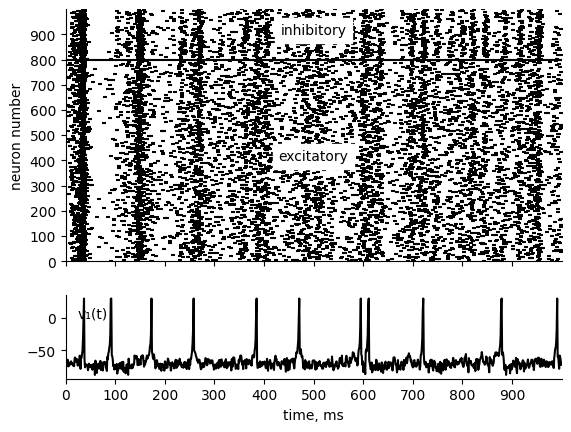

In [2]:
integrators=[#'exact', 
             #'exponential_euler', 
             'euler', 
             #'rk2', 
             #'rk4', 
             #'heun', 
             #'milstein'
]

for integrator in integrators:
    print(integrator)
    Izhikevic2007(integrator)